In [1]:
#Import
import pandas as pd
import numpy as np

#Data
import pickle
import statistics
from collections import Counter
from sklearn.manifold import TSNE

#Chemistry
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Fingerprints import FingerprintMols
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def load_pickle_file(filename):
    """Load a pickle file and return its contents."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Load the data
df = load_pickle_file('cleaned_df_original.pkl')
df_big = load_pickle_file('qspr/DB.pkl')

In [26]:
rep_sub = load_pickle_file('C:/Users/leth/GauL-HDAD/results2_sub/representations.pickle')
rep_big = load_pickle_file('C:/Users/leth/GauL-HDAD/results2/representations.pickle')

In [27]:
def compute_fingerprints(smiles_list):
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        # Using MorganGenerator
        morgan_gen = AllChem.GetMorganGenerator(radius=2, fpSize=2048)
        fp = morgan_gen.GetFingerprint(mol)
        fingerprints.append(np.array(fp))
    return np.array(fingerprints)

In [28]:
df_big

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,CAS_B,SMILES_A,SMILES_B,MW_A,MW_B,KA,KB
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,304.01,100000.0,0.1229,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,314.00,100000.0,0.1218,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,324.01,100000.0,0.1211,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,333.98,100000.0,0.1204,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.800000,0.200000,344.15,100000.0,0.1194,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,322.02,100000.0,0.1397,0.217467,0.782533,1120-21-4,124-10-7,CCCCCCCCCCC,CCCCCCCCCCCCCC(=O)OC,156.3106,242.4008,NaN,NaN
28,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,331.75,100000.0,0.1384,0.217467,0.782533,1120-21-4,124-10-7,CCCCCCCCCCC,CCCCCCCCCCCCCC(=O)OC,156.3106,242.4008,NaN,NaN
29,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,341.92,100000.0,0.1354,0.217467,0.782533,1120-21-4,124-10-7,CCCCCCCCCCC,CCCCCCCCCCCCCC(=O)OC,156.3106,242.4008,NaN,NaN
30,undecane,tetradecanoic acid methyl ester,0.279504,0.648561,351.90,100000.0,0.133,0.217467,0.782533,1120-21-4,124-10-7,CCCCCCCCCCC,CCCCCCCCCCCCCC(=O)OC,156.3106,242.4008,NaN,NaN


In [29]:
# Get list of smiles from subset and big dataset (drop duplicates)
AandB = list(set(df['SMILES_A'].tolist() + df['SMILES_B'].tolist()))
AandB_big = list(set(df_big['SMILES_A'].tolist() + df_big['SMILES_B'].tolist()))

In [30]:
# Remove weird SMILES no data
AandB_big = [smile for smile in AandB_big if '@' not in smile and '\\' not in smile]

In [31]:
fingerprints = compute_fingerprints(AandB)
fingerprints_big = compute_fingerprints(AandB_big)

In [32]:
pca = PCA(n_components=3)
kmeans = KMeans(n_clusters=3, random_state=42)

In [33]:
reduced_data = pca.fit_transform(fingerprints)
clusters = kmeans.fit_predict(fingerprints)

reduced_data_big = pca.fit_transform(fingerprints_big)
clusters_big = kmeans.fit_predict(fingerprints_big)

In [34]:
# Combine the whole dataset and subset
combined_data = np.concatenate((fingerprints, fingerprints_big), axis=0)

# Apply t-SNE to the combined data
tsne_model = TSNE(n_components=3, random_state=42)
combined_tsne = tsne_model.fit_transform(combined_data)

# Get the cluster labels
combined_clusters = np.concatenate([clusters_big, clusters])

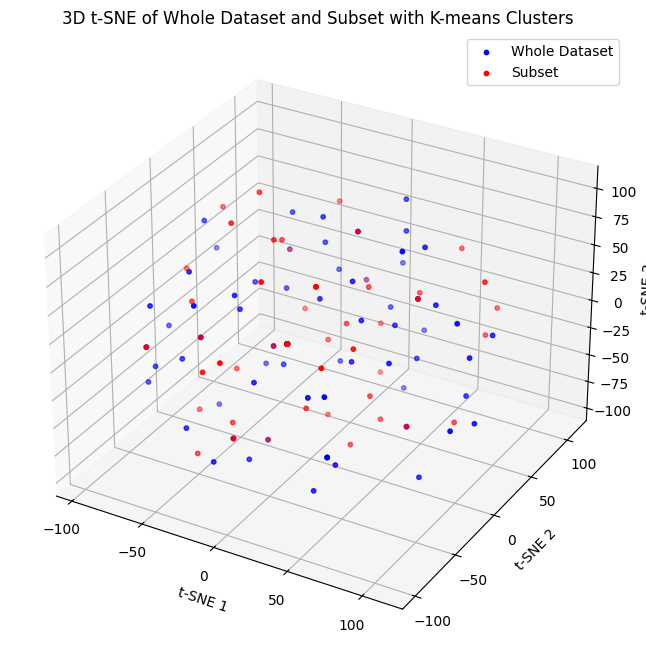

In [35]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# We will use two distinct colors for the whole dataset and the subset
scatter_whole = ax.scatter(combined_tsne[:len(fingerprints_big), 0], combined_tsne[:len(fingerprints_big), 1], combined_tsne[:len(fingerprints_big), 2],
                           c='blue', label='Whole Dataset', s=10)
scatter_subset = ax.scatter(combined_tsne[len(fingerprints_big):, 0], combined_tsne[len(fingerprints_big):, 1], combined_tsne[len(fingerprints_big):, 2],
                            c='red', label='Subset', s=10)

# Add labels and color bar
ax.set_title("3D t-SNE of Whole Dataset and Subset with K-means Clusters")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")

# Add legend to indicate which color corresponds to which dataset
ax.legend()

# Show the plot
plt.show()

GAUL-HDAD

In [36]:
# Modify and Save the modified list to a txt file
def add_numbers_to_list(input_list):
    output_list = []
    for idx, item in enumerate(input_list, 1):
        output_list.append(f"{item}\t{idx}")
    return output_list

def save_to_txt(output_list, filename):
    with open(filename, 'w') as f:
        for line in output_list:
            f.write(line + "\n")

In [37]:
# modified_list = add_numbers_to_list(AandB_big)
# modified_list_sub = add_numbers_to_list(AandB)

In [38]:
# # Save to 'output.txt'
# output_filename = 'input.txt'
# save_to_txt(modified_list, output_filename)
# output_filename_sub = 'input_sub.txt'
# save_to_txt(modified_list_sub, output_filename_sub)

In [39]:
# len(rep_sub)

In [40]:
# len(rep_sub[0])

In [41]:
# type(rep_sub[0])

In [42]:
# rep_sub[0][:10]  # Display the first 10 elements of the array for inspection

In [43]:
# Create a mapping from AandB to rep_sub
mapping_big = dict(zip(AandB_big, rep_big))

# Add a new column 'repA' by mapping values from SMILES_A
df['repA'] = df['SMILES_A'].map(mapping_big)
df['repB'] = df['SMILES_B'].map(mapping_big)
df_big['repA'] = df_big['SMILES_A'].map(mapping_big)
df_big['repB'] = df_big['SMILES_B'].map(mapping_big)

In [44]:
df['repAB'] = df['repA']*df['XA'] + df['repB']*df['XB']
df_big['repAB'] = df_big['repA']*df_big['XA'] + df_big['repB']*df_big['XB']

In [45]:
df_big = df_big[df_big['repAB'].apply(lambda x: not all(pd.isna(val) for val in x))]

In [46]:
df['repAB']

0    [0.8331273658446439, 1.3623833632725755, 1.705...
1    [0.8251891358977148, 1.3315564882067223, 1.676...
2    [0.8205798410898206, 1.313657012362033, 1.6593...
3    [0.8078616017124828, 1.2642677179016872, 1.612...
4    [0.7972772951165774, 1.223165217813883, 1.5739...
                           ...                        
4    [0.31056900269225524, 0.4280887631827156, 0.55...
5    [0.3399772752218612, 0.4717667788481218, 0.611...
6    [0.38717573730641397, 0.5418672978172923, 0.70...
7    [0.43038048336842766, 0.6060362344121482, 0.78...
8    [0.46487166719944695, 0.6572635367357728, 0.85...
Name: repAB, Length: 1453, dtype: object

In [47]:
df_big['repAB']

0     [0.1881550741315959, 0.21714834193765, 0.26253...
1     [0.1881550741315959, 0.21714834193765, 0.26253...
0     [0.7387113322725846, 0.4988393653271027, 0.320...
1     [0.7387113322725846, 0.4988393653271027, 0.320...
2     [0.7387113322725846, 0.4988393653271027, 0.320...
                            ...                        
27    [1.0114218277391842, 0.5649573786661218, 0.273...
28    [1.0114218277391842, 0.5649573786661218, 0.273...
29    [1.0114218277391842, 0.5649573786661218, 0.273...
30    [1.0114218277391842, 0.5649573786661218, 0.273...
31    [1.0114218277391842, 0.5649573786661218, 0.273...
Name: repAB, Length: 3069, dtype: object

In [48]:
clusters_big_gau = kmeans.fit_predict(df_big['repAB'].tolist())
clusters_gau = kmeans.fit_predict(df['repAB'].tolist())

In [49]:
# Combine whole dataset and subset
combined_data_gau = df_big['repAB'].tolist() + df['repAB'].tolist()
combined_data_gau = np.array(combined_data_gau)

In [50]:
# Apply t-SNE to the combined data
tsne_model_gau = TSNE(n_components=3, random_state=42)
combined_tsne_gau = tsne_model_gau.fit_transform(combined_data_gau)

# Get the cluster labels
combined_clusters_gau = np.concatenate([clusters_big_gau, clusters_gau])

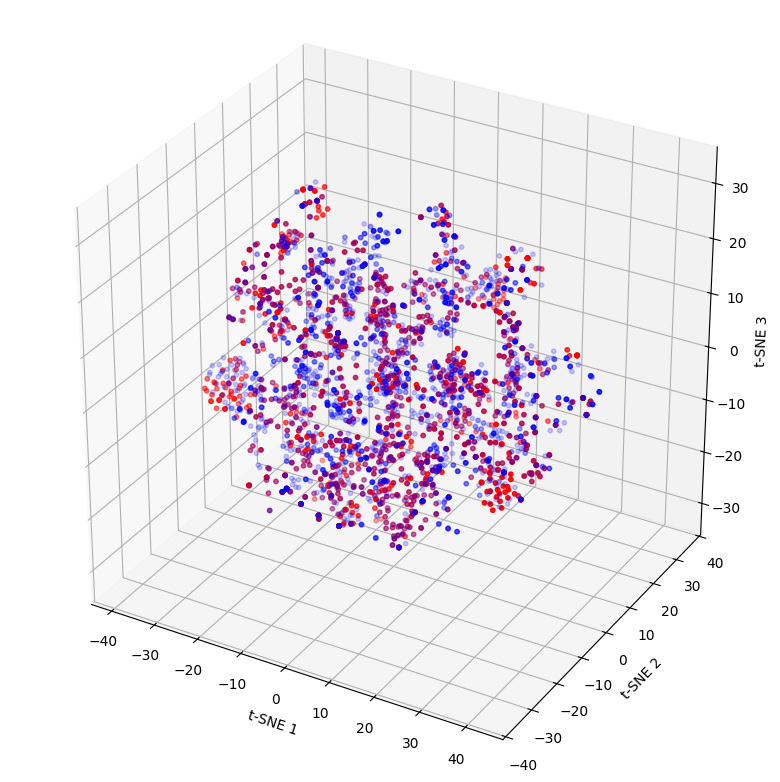

In [63]:
# 3D scatter plot
fig_gau = plt.figure(figsize=(12, 8))
ax_gau = fig_gau.add_subplot(111, projection='3d') # type: Axes3D

# We will use two distinct colors for the whole dataset and the subset
scatter_whole_gau = ax_gau.scatter(combined_tsne_gau[:len(df_big['repAB'].tolist()), 0], 
                                   combined_tsne_gau[:len(df_big['repAB'].tolist()), 1], 
                                   combined_tsne_gau[:len(df_big['repAB'].tolist()), 2],
                           c='blue', label='DB', s=10, alpha=0.2)
scatter_subset_gau = ax_gau.scatter(combined_tsne_gau[len(df_big['repAB'].tolist()):, 0], 
                                    combined_tsne_gau[len(df_big['repAB'].tolist()):, 1], 
                                    combined_tsne_gau[len(df_big['repAB'].tolist()):, 2],
                            c='red', label='SDB1', s=10)

# Add labels and color bar
ax_gau.set_xlabel("t-SNE 1")
ax_gau.set_ylabel("t-SNE 2")
ax_gau.set_zlabel("t-SNE 3")

# Show the plot
ax_gau.set_box_aspect([1, 0.9, 0.95])
fig_gau.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
plt.show()

In [64]:
# Save the figure as an SVG file
fig_gau.savefig('tsne_3Dplot.svg', format='svg', bbox_inches='tight')

In [53]:
# Apply t-SNE to the combined data for 2D
tsne_model_gau_2d = TSNE(n_components=2, random_state=42)
combined_tsne_gau_2d = tsne_model_gau_2d.fit_transform(combined_data_gau)

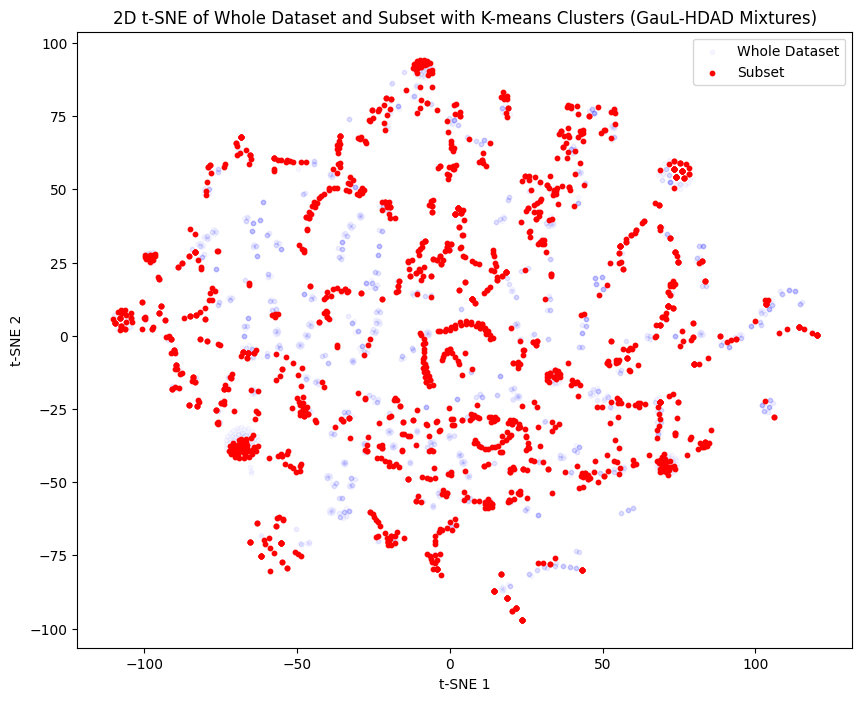

In [54]:
# 2D scatter plot
fig_gau_2d = plt.figure(figsize=(10, 8))
ax_gau_2d = fig_gau_2d.add_subplot(111)

# We will use two distinct colors for the whole dataset and the subset
scatter_whole_gau_2d = ax_gau_2d.scatter(combined_tsne_gau_2d[:len(df_big['repAB'].tolist()), 0], 
                                          combined_tsne_gau_2d[:len(df_big['repAB'].tolist()), 1],
                                          c='blue', label='Whole Dataset', s=10, alpha=0.03)
scatter_subset_gau_2d = ax_gau_2d.scatter(combined_tsne_gau_2d[len(df_big['repAB'].tolist()):, 0], 
                                           combined_tsne_gau_2d[len(df_big['repAB'].tolist()):, 1],
                                           c='red', label='Subset', s=10)

# Add labels and color bar
ax_gau_2d.set_title("2D t-SNE of Whole Dataset and Subset with K-means Clusters (GauL-HDAD Mixtures)")
ax_gau_2d.set_xlabel("t-SNE 1")
ax_gau_2d.set_ylabel("t-SNE 2")

# Add legend to indicate which color corresponds to which dataset
ax_gau_2d.legend()

# Show the plot
plt.show()


In [55]:
import plotly.graph_objects as go

# Create scatter plot with Plotly
fig = go.Figure()

# Whole Dataset (blue points)
fig.add_trace(go.Scatter(
    x=combined_tsne_gau_2d[:len(df_big['repAB'].tolist()), 0], 
    y=combined_tsne_gau_2d[:len(df_big['repAB'].tolist()), 1],
    mode='markers',
    name='Whole Dataset',
    marker=dict(color='blue', size=6, opacity=0.3),
    hovertemplate="CAS_A: %{text}<br>CAS_B: %{customdata}<extra></extra>",  # Customize hover text
    text=[f"CAS_A: {row['CAS_A']}" for _, row in df_big.iterrows()],  # Add CAS_A info as text
    customdata=[f"CAS_B: {row['CAS_B']}" for _, row in df_big.iterrows()]  # Add CAS_B info as customdata
))

# Subset Dataset (red points)
fig.add_trace(go.Scatter(
    x=combined_tsne_gau_2d[len(df_big['repAB'].tolist()):, 0], 
    y=combined_tsne_gau_2d[len(df_big['repAB'].tolist()):, 1],
    mode='markers',
    name='Subset',
    marker=dict(color='red', size=6),
    hovertemplate="CAS_A: %{text}<br>CAS_B: %{customdata}<extra></extra>",  # Customize hover text
    text=[f"CAS_A: {row['CAS_A']}" for _, row in df_big[len(df_big['repAB'].tolist()):].iterrows()],  # Add CAS_A info as text for subset
    customdata=[f"CAS_B: {row['CAS_B']}" for _, row in df_big[len(df_big['repAB'].tolist()):].iterrows()]  # Add CAS_B info as customdata for subset
))

# Update layout (title, axis labels, etc.)
fig.update_layout(
    title="2D t-SNE of Whole Dataset and Subset with K-means Clusters (GauL-HDAD Mixtures)",
    xaxis_title="t-SNE 1",
    yaxis_title="t-SNE 2",
    showlegend=True
)

# Show the plot
fig.show()


PURE COMPOUNDS

In [56]:
rep_fingerprints = list(set(tuple(x) for x in df['repA'].tolist() + df['repB'].tolist()))
rep_fingerprints_big = list(set(tuple(x) for x in df_big['repA'].tolist() + df_big['repB'].tolist()))

In [57]:
rep_clusters_big_gau = kmeans.fit_predict(rep_fingerprints_big)
rep_clusters_gau = kmeans.fit_predict(rep_fingerprints)

In [58]:
# Combine the whole dataset and subset
rep_combined_data = np.concatenate((rep_fingerprints_big, rep_fingerprints), axis=0)

# Apply t-SNE to the combined data
rep_tsne_model = TSNE(n_components=3, random_state=42)
rep_combined_tsne = rep_tsne_model.fit_transform(rep_combined_data)

# Get the cluster labels
rep_combined_clusters = np.concatenate([rep_clusters_big_gau, rep_clusters_gau])

In [59]:
len(rep_combined_tsne)

128

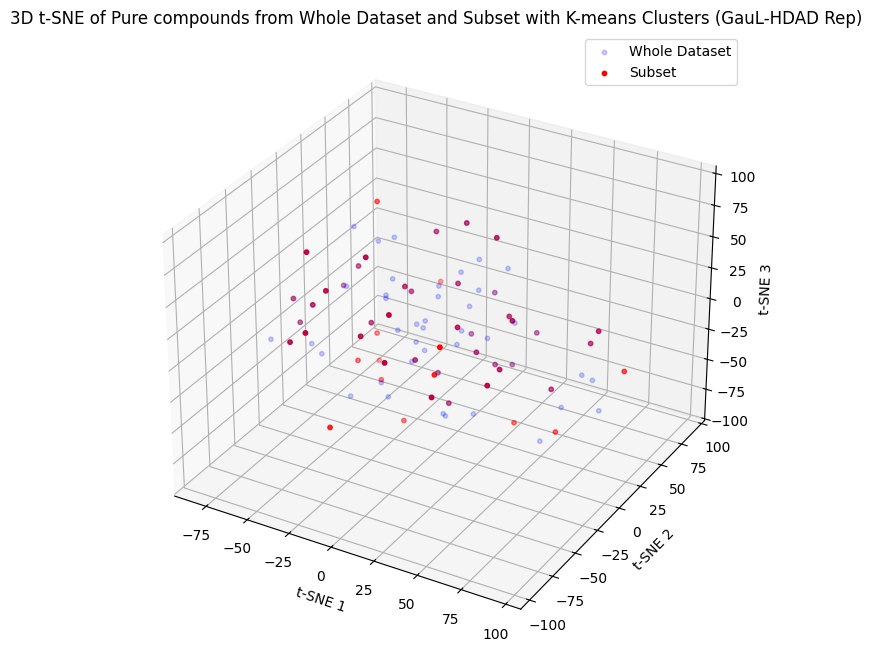

In [60]:
# 3D scatter plot
rep_fig = plt.figure(figsize=(10, 8))
rep_ax_gau = rep_fig.add_subplot(111, projection='3d')

# We will use two distinct colors for the whole dataset and the subset
# rep_scatter_whole_gau = rep_ax_gau.scatter(rep_combined_tsne[:len(df_big['repA'].tolist()), 0], 
#                                    rep_combined_tsne[:len(df_big['repA'].tolist()), 1], 
#                                    rep_combined_tsne[:len(df_big['repA'].tolist()), 2],
#                            c='blue', label='Whole Dataset', s=10, alpha=1)
# rep_scatter_subset_gau = rep_ax_gau.scatter(rep_combined_tsne[len(df_big['repA'].tolist()):, 0], 
#                                     rep_combined_tsne[len(df_big['repA'].tolist()):, 1], 
#                                     rep_combined_tsne[len(df_big['repA'].tolist()):, 2],
#                             c='red', label='Subset', s=10)

rep_scatter_whole_gau = rep_ax_gau.scatter(
    rep_combined_tsne[:len(rep_fingerprints_big), 0], 
    rep_combined_tsne[:len(rep_fingerprints_big), 1], 
    rep_combined_tsne[:len(rep_fingerprints_big), 2],
    c='blue', label='Whole Dataset', s=10, alpha=0.2
)

rep_scatter_subset_gau = rep_ax_gau.scatter(
    rep_combined_tsne[len(rep_fingerprints_big):, 0], 
    rep_combined_tsne[len(rep_fingerprints_big):, 1], 
    rep_combined_tsne[len(rep_fingerprints_big):, 2],
    c='red', label='Subset', s=10
)

# Add labels and color bar
rep_ax_gau.set_title("3D t-SNE of Pure compounds from Whole Dataset and Subset with K-means Clusters (GauL-HDAD Rep)")
rep_ax_gau.set_xlabel("t-SNE 1")
rep_ax_gau.set_ylabel("t-SNE 2")
rep_ax_gau.set_zlabel("t-SNE 3")

# Add legend to indicate which color corresponds to which dataset
rep_ax_gau.legend()

# Show the plot
plt.show()